First 5 rows:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S



Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB

Statistical Summary:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200



Missing Values:
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


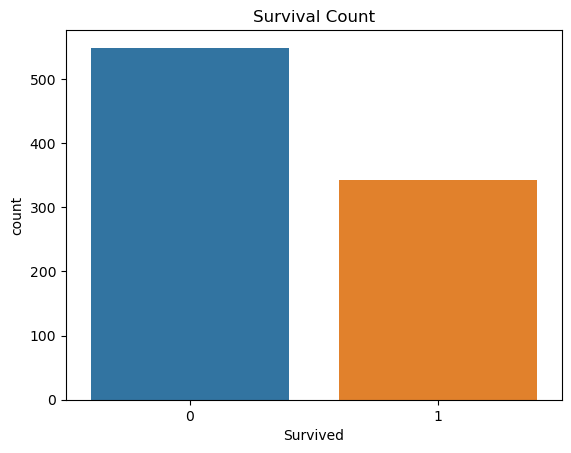

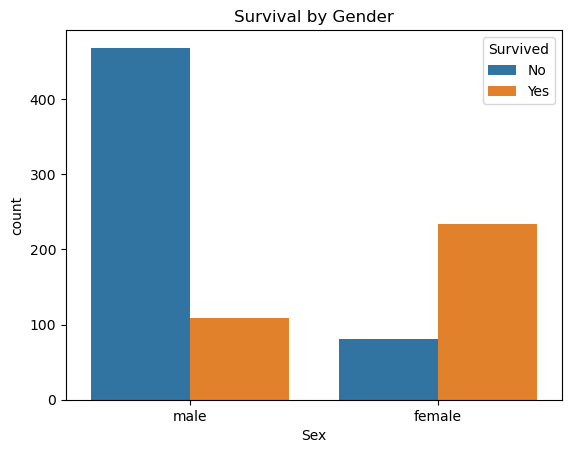

C:\Users\DELL\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


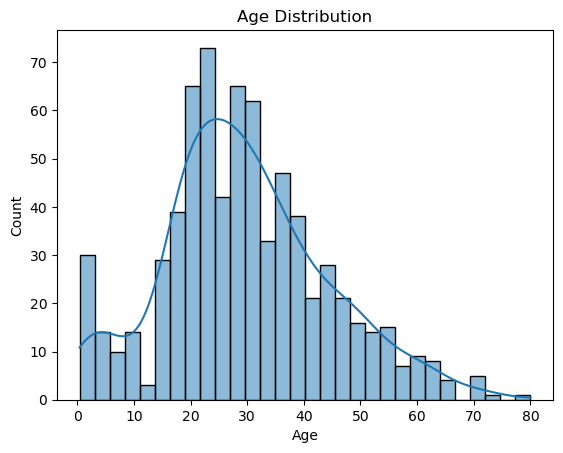


Data after encoding:


,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_male,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,True,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,False,False,False
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,False,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,False,False,True
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,True,False,True



Logistic Regression Results
Accuracy: 0.8044692737430168
              precision    recall  f1-score   support

           0       0.82      0.85      0.84       105
           1       0.77      0.74      0.76        74

    accuracy                           0.80       179
   macro avg       0.80      0.80      0.80       179
weighted avg       0.80      0.80      0.80       179


Random Forest Results
Accuracy: 0.8212290502793296
              precision    recall  f1-score   support

           0       0.83      0.88      0.85       105
           1       0.81      0.74      0.77        74

    accuracy                           0.82       179
   macro avg       0.82      0.81      0.81       179
weighted avg       0.82      0.82      0.82       179


Tuned Random Forest Results
Improved Accuracy: 0.8156424581005587
              precision    recall  f1-score   support

           0       0.81      0.90      0.85       105
           1       0.83      0.70      0.76        74

    a

In [5]:
# ================================
# TITANIC SURVIVAL PREDICTION
# Full End-to-End ML Notebook Code
# ================================

# -------- 1. Import Libraries --------
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

%matplotlib inline


# -------- 2. Load Dataset --------
df = pd.read_csv("C:\\Users\\DELL\\OneDrive\\Desktop (1)\\INTERNSHIP\\titanic.csv")

print("First 5 rows:")
display(df.head())


# -------- 3. Dataset Overview --------
print("\nDataset Info:")
df.info()

print("\nStatistical Summary:")
display(df.describe())

print("\nMissing Values:")
print(df.isnull().sum())


# -------- 4. Exploratory Data Analysis (EDA) --------

# Survival Count
plt.figure()
sns.countplot(x='Survived', data=df)
plt.title("Survival Count")
plt.show()

# Survival by Gender (ERROR-FREE)
df_plot = df.copy()
df_plot['Survived'] = df_plot['Survived'].map({0: 'No', 1: 'Yes'})

plt.figure()
sns.countplot(x='Sex', hue='Survived', data=df_plot)
plt.title("Survival by Gender")
plt.show()

# Age Distribution
plt.figure()
sns.histplot(df['Age'], bins=30, kde=True)
plt.title("Age Distribution")
plt.show()


# -------- 5. Data Cleaning --------
df['Age'].fillna(df['Age'].median(), inplace=True)
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)


# -------- 6. Encoding Categorical Variables --------
df = pd.get_dummies(df, columns=['Sex', 'Embarked'], drop_first=True)

print("\nData after encoding:")
display(df.head())


# -------- 7. Feature Selection --------
X = df.drop(['Survived', 'Name', 'Ticket', 'Cabin'], axis=1)
y = df['Survived']


# -------- 8. Train-Test Split --------
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


# -------- 9. Logistic Regression Model --------
lr = LogisticRegression(max_iter=1000)
lr.fit(X_train, y_train)

lr_pred = lr.predict(X_test)

print("\nLogistic Regression Results")
print("Accuracy:", accuracy_score(y_test, lr_pred))
print(classification_report(y_test, lr_pred))


# -------- 10. Random Forest Model --------
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

rf_pred = rf.predict(X_test)

print("\nRandom Forest Results")
print("Accuracy:", accuracy_score(y_test, rf_pred))
print(classification_report(y_test, rf_pred))


# -------- 11. Hyperparameter Tuning (GridSearchCV) --------
param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [5, 10, None]
}

grid = GridSearchCV(
    RandomForestClassifier(random_state=42),
    param_grid,
    cv=5
)

grid.fit(X_train, y_train)


# -------- 12. Best Model Evaluation --------
best_model = grid.best_estimator_
best_pred = best_model.predict(X_test)

print("\nTuned Random Forest Results")
print("Improved Accuracy:", accuracy_score(y_test, best_pred))
print(classification_report(y_test, best_pred))


# -------- 13. Conclusion --------
print("Model training and evaluation completed successfully!")
